In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import datasets


In [12]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2      0.0
1            4.9           3.0            1.4           0.2      0.0
2            4.7           3.2            1.3           0.2      0.0
3            4.6           3.1            1.5           0.2      0.0
4            5.0           3.6            1.4           0.2      0.0


In [13]:
# #X表示我們只取幾個特徵空間中的幾個維度
X, Y = iris.data[:,2:4], iris.target

print("Features : ", iris.feature_names)
print("Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape) 

Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


In [14]:
#該資料數據類型#
print(df.dtypes)

#用於統計字符串裡某個字符出現的次數#
print(df.count())

#該資料是否有缺失值#
print(df.count()==len(df))

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species          float64
dtype: object
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64
SepalLengthCm    True
SepalWidthCm     True
PetalLengthCm    True
PetalWidthCm     True
Species          True
dtype: bool


**n_clusters: 要分成幾群 ，給定數值**

**affinity: 距離的計算方式，"euclidean","l1","l2","manhattan","cosine"...**

**linkage: 群與群之間的距離，"ward","complete","average","single"**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
Hierarchicalmodel=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete') #群間距離採用complete#

In [ ]:
y_pred = Hierarchicalmodel.fit_predict(X)
y_true = iris.target

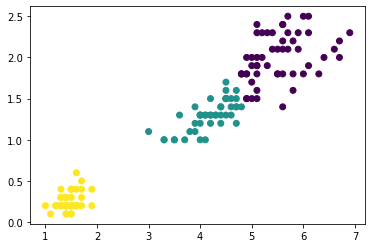

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Hierarchicalmodel.fit_predict(X))

**metric: 距離的計算方式**

**method: 群與群之間的計算方式，"single", "complete", "average", "weighted", "centroid", "median", "ward"**

**階層式樹狀圖**

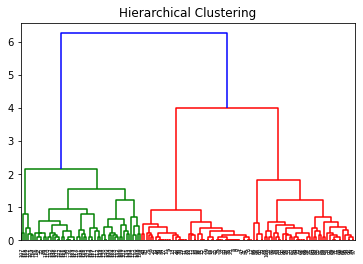

In [ ]:
import scipy.cluster.hierarchy as sch
dis=sch.linkage(X,metric='euclidean',method='complete') #群間距離採用complete#
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

**Purity(純度)績效衡量**

In [ ]:
purity_score(y_true, y_pred)

0.96

**純度為0.96，證明分群效果良好。**